<h2>Introduction to Python</h2>
<h3>Learn how read a file, shuffle data, filter data, plot data, split file into training and test sets</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Modified IRIS Dataset - Introduced NaNs for some of the observations

Dataset: https://archive.ics.uci.edu/ml/datasets/Iris/

In [2]:
# Create a dataframe from CSV
df = pd.read_csv('IrisMissingData.csv')

In [3]:
# Top N rows
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,NaN,1.4,0.3,Iris-setosa
7,5.0,3.4,NaN,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# We also read by row label
df.loc[0:2]

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [13]:
df.loc[[7]]

,sepal_length,sepal_width,petal_length,petal_width,class
7,5.0,3.4,NaN,0.2,Iris-setosa


In [8]:
# look for a specific row label
df.loc[7]

sepal_length            5.0
sepal_width             3.4
petal_length            NaN
petal_width             0.2
class           Iris-setosa
Name: 7, dtype: object

In [10]:
type(df.loc[7])

pandas.core.series.Series

In [9]:
# View data for a column
df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    NaN
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [11]:
type(df['sepal_length'])

pandas.core.series.Series

In [12]:
# View data for many columns

df[['sepal_length','sepal_width']]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,NaN,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [14]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,NaN,1.4,0.3,Iris-setosa
7,5.0,3.4,NaN,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [15]:
# View last N rows
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,class
145,NaN,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [16]:
# Replace missing values in a column with average value for that column
# we can use df.mean to compute mean for all numeric columns in the dataframe
df.mean(numeric_only=True)

sepal_length    5.836486
sepal_width     3.056463
petal_length    3.748630
petal_width     1.205405
dtype: float64

In [19]:
# Use fillna to replace missing values
# Iterates through the four numeric columns 
# and replaces the missing values with the column-wise average
df = df.fillna(df.mean(numeric_only=True))

In [20]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.500000,1.40000,0.2,Iris-setosa
1,4.9,3.000000,1.40000,0.2,Iris-setosa
2,4.7,3.200000,1.30000,0.2,Iris-setosa
3,4.6,3.100000,1.50000,0.2,Iris-setosa
4,5.0,3.600000,1.40000,0.2,Iris-setosa
5,5.4,3.900000,1.70000,0.4,Iris-setosa
6,4.6,3.056463,1.40000,0.3,Iris-setosa
7,5.0,3.400000,3.74863,0.2,Iris-setosa
8,4.4,2.900000,1.40000,0.2,Iris-setosa
9,4.9,3.100000,1.50000,0.1,Iris-setosa


In [21]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,5.836486,3.0,5.2,2.3,Iris-virginica
146,6.300000,2.5,5.0,1.9,Iris-virginica
147,6.500000,3.0,5.2,2.0,Iris-virginica
148,6.200000,3.4,5.4,2.3,Iris-virginica
149,5.900000,3.0,5.1,1.8,Iris-virginica


In [22]:
df.shape

(150, 5)

In [24]:
# Print first 5 index values and last 5 index values
index_list = list(df.index)
print(index_list[:5])
print(index_list[-5:])

[0, 1, 2, 3, 4]
[145, 146, 147, 148, 149]


In [25]:
# Randomize a list
np.random.seed(5)
np.random.shuffle(index_list)

In [26]:
print('Shuffled list')
print(index_list[:5])
print(index_list[-5:])

Shuffled list
[82, 134, 114, 42, 109]
[8, 73, 144, 118, 99]


In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
# Dataframe is now shuffled
# Let's access by index-position (iloc method)
df = df.iloc[index_list]

In [29]:
# Let's look at the shuffled data
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
82,5.8,2.7,3.9,1.2,Iris-versicolor
134,6.1,2.6,5.6,1.4,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
42,4.4,3.2,1.3,0.2,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica
57,4.9,2.4,3.3,1.0,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-setosa
70,5.9,3.2,4.8,1.8,Iris-versicolor
25,5.0,3.0,1.6,0.2,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor


In [30]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
8,4.4,2.9,1.4,0.2,Iris-setosa
73,6.1,2.8,4.7,1.2,Iris-versicolor
144,6.7,3.3,5.7,2.5,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [31]:
# Split data into training and test sets
# training = 70%
# test = 30%
size = df.shape[0]
train = round(size *.7)
test = size - train

In [32]:
print(f'Total:{size}, Training:{train}, Test:{test}')

Total:150, Training:105, Test:45


In [33]:
# Save the training data to CSV
df[:train].to_csv(
    'iris_data_train.csv',
    index=True,
    index_label='Row',
    columns=['sepal_length','sepal_width','petal_length','petal_width','class'])

In [34]:
# Save the test data
df[train:].to_csv(
    'iris_data_test.csv',
    index=True,
    index_label='Row',
    columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [35]:
# Let's count number of unique class values and their count
# All three classes have same number of samples
df['class'].value_counts()

class
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: count, dtype: int64

In [36]:
# Descriptive statistics for all numeric columns
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.836486,3.056463,3.748630,1.205405
std,0.824959,0.429307,1.741643,0.757759
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
# Find all rows that match the condition.  Returns a Series that contains index value and True/False
setosa = df['class'] == 'Iris-setosa'

In [38]:
setosa.head()

82     False
134    False
114    False
42      True
109    False
Name: class, dtype: bool

In [39]:
# View only Setosa data
df[setosa].head()

,sepal_length,sepal_width,petal_length,petal_width,class
42,4.4,3.2,1.3,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
25,5.0,3.0,1.6,0.2,Iris-setosa
26,5.0,3.4,1.6,0.4,Iris-setosa
23,5.1,3.3,1.7,0.5,Iris-setosa


In [46]:
%matplotlib inline

Text(0.5, 1.0, 'Petal Length Histogram')

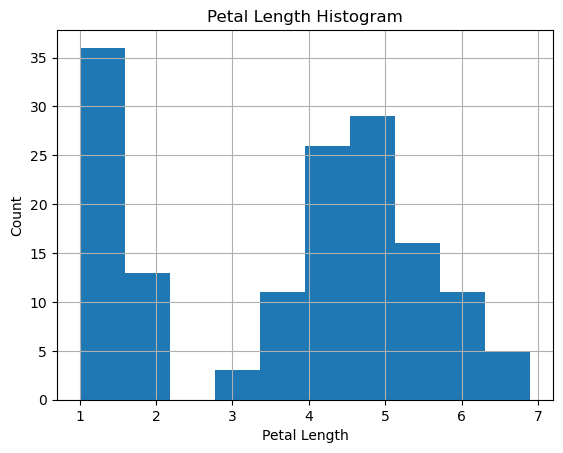

In [47]:
plt.hist(df.petal_length)
plt.grid(True)
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.title('Petal Length Histogram')

Text(0.5, 1.0, 'Petal Length Scatter Plot')

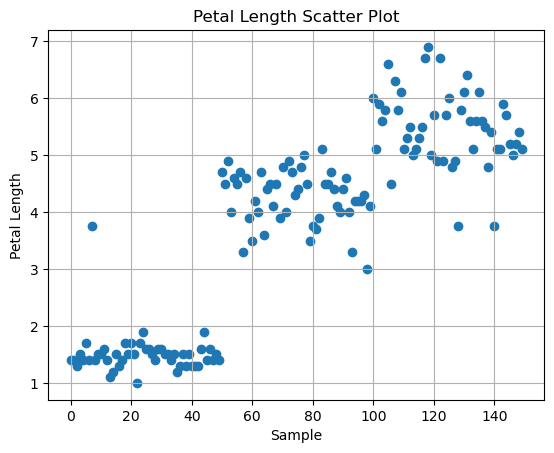

In [48]:
plt.scatter(df.index, df.petal_length)
plt.grid(True)
plt.xlabel('Sample') 
plt.ylabel('Petal Length')
plt.title('Petal Length Scatter Plot')

In [49]:
versicolor = df['class'] == "Iris-versicolor"
virginica = df['class'] == "Iris-virginica"

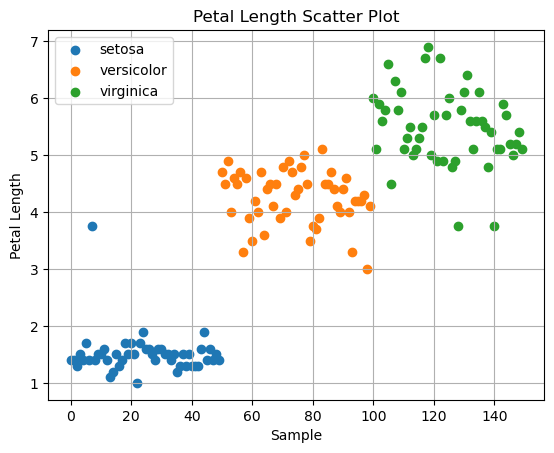

In [50]:
plt.scatter(df[setosa].index, df[setosa].petal_length, label ='setosa')
plt.scatter(df[versicolor].index, df[versicolor].petal_length, label = 'versicolor')
plt.scatter(df[virginica].index, df[virginica].petal_length, label = 'virginica')
plt.grid(True)
plt.xlabel('Sample') 
plt.ylabel('Petal Length')
plt.title('Petal Length Scatter Plot')
plt.legend()

In [ ]:
df.